In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
import math
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [23]:
(X_dev, y_dev), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

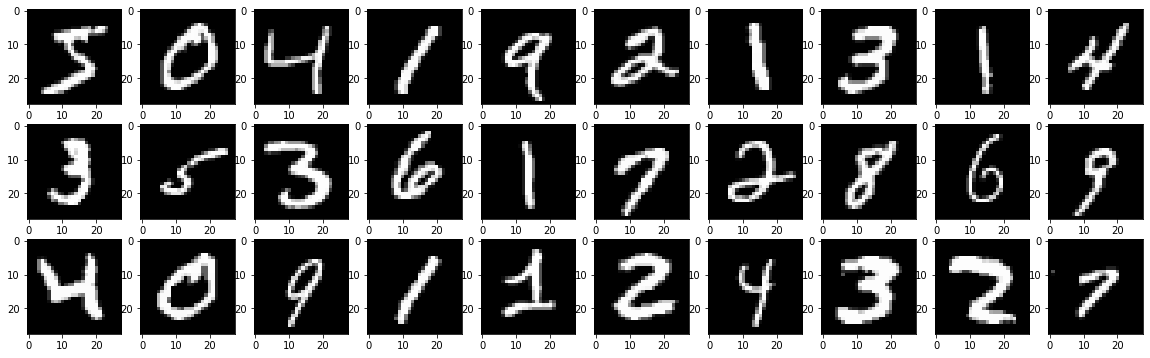

In [24]:
plt.figure(figsize=(20,6))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_dev[i], cmap="gray")

In [25]:
X_dev = X_dev.reshape(X_dev.shape[0],X_dev.shape[1]*X_dev.shape[2])

In [26]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev, test_size=0.2)

In [ ]:
X_train.shape

In [11]:
def dnn(n_features, n_output):
    input_lag = tf.keras.layers.Input(shape=(n_features,1))
    skjult_lag = tf.keras.layers.Dense(n_features*2, activation='relu')(input_lag)
    flatten = tf.keras.layers.Flatten()(skjult_lag)
    output_lag = tf.keras.layers.Dense(n_output, activation='sigmoid')(flatten)
    modell = tf.keras.models.Model(inputs=input_lag, outputs=output_lag)
    return modell

In [29]:
y_train.shape

(48000,)

In [30]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [31]:
model = dnn(X_train.shape[1],y_train.shape[1])

In [32]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 784, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 784, 1568)           │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1229312)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │      12,293,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,296,266 (46.91 MB)

 Trainable params: 12,296,266 (46.91 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [34]:
model

<Functional name=functional_1, built=True>

In [35]:
y_val.shape

(12000, 10)

In [ ]:
history = model.fit(x=X_train,y=y_train, epochs=15, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 258s 342ms/step - auc_1: 0.8999 - categorical_accuracy: 0.7059 - loss: 19.6223 - val_auc_1: 0.9709 - val_categorical_accuracy: 0.9122 - val_loss: 0.3222
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 259s 346ms/step - auc_1: 0.9743 - categorical_accuracy: 0.9152 - loss: 0.3000 - val_auc_1: 0.9802 - val_categorical_accuracy: 0.9147 - val_loss: 0.3161
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 248s 331ms/step - auc_1: 0.9766 - categorical_accuracy: 0.9141 - loss: 0.3038 - val_auc_1: 0.9801 - val_categorical_accuracy: 0.9139 - val_loss: 0.3220
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 236s 315ms/step - auc_1: 0.9795 - categorical_accuracy: 0.9166 - loss: 0.2970 - val_auc_1: 0.9798 - val_categorical_accuracy: 0.9160 - val_loss: 0.3284
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 229s 306ms/step - auc_1: 0.9815 - categorical_accuracy: 0.9187 - loss: 0.2886 - val_auc_1: 0.9807 - val_categorical_accuracy: 0.9036 - val_loss: 0.3497
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history[list(history.history.keys())[2]], label="AUROC")
plt.plot(history.history[list(history.history.keys())[5]], label="val_AUROC")
plt.legend()